In [1]:
# 若怕有passby ref的問題，用id()確認一下值的位置
# import

import numpy as np
import random as r
import scipy.special as sc_special
import pandas as pd
from datetime import datetime
import copy
import matplotlib.pyplot as plt
import time

# import cv2 # 這個好像沒有用到
# pip install opencv-python # if 'cv2' is unavailabe

In [2]:
# This block is for converting original data: (1) time data (2) others

# (1) time data

# for the use in time data func mentioned below
def idtfy_arr_shape(arr1):
    A = arr1.shape
    return A

# for' hour_data_plus_0p5_orNOT ' shown below
def choose_hour_int(list1, row_count):  # return hour data in new array
    
    list2 = np.zeros(idtfy_arr_shape(list1)) # dtype = 'float64'

    for each_array in range(row_count):
        str1 = ""
        temp = ""
        TEMP = ""
        
        arr = list1[each_array]
        str1 = str1.join(arr) # change array to str
        
        if str1 == "nan":
            list2[each_array] = 100   # value = 100: NAN
        else:
            # change to type: datetime 
            temp = datetime.strptime(str1, '%Y/%m/%d %H:%M') # strptime arg1: 'str', arg2: '%Y-%m-%d %H:%M:%S'
            TEMP = temp.strftime('%H') # choose "hour" # strftime original arg: '%Y-%m-%d %H:%M:%S'
            TEMP = int(TEMP) # change to "int"
            list2[each_array] = TEMP
    
    return list2 # return datatype = 'float64'

# for' hour_data_plus_0p5_orNOT ' shown below
def choose_minute_int(list1, row_count): # return minute data in new array
    
    list2 = np.zeros(idtfy_arr_shape(list1)) # dtype = 'float64'

    for each_array in range(row_count):
        str1 = ""
        temp = ""
        TEMP = ""
        
        arr = list1[each_array]
        str1 = str1.join(arr) # change array to str
        
        if str1 == "nan":
            list2[each_array] = 100   # value = 100: NAN
        else:
            # change to type: datetime 
            temp = datetime.strptime(str1, '%Y/%m/%d %H:%M') # strptime arg1: 'str', arg2: '%Y-%m-%d %H:%M:%S'
            TEMP = temp.strftime('%M') # choose "minute" # strftime original arg: '%Y-%m-%d %H:%M:%S'
            TEMP = int(TEMP) # change to "int"
            list2[each_array] = TEMP
    
    return list2 # return datatype = 'float64'

# return hour data (+0.5 or not) in new array
def hour_data_plus_0p5_orNOT(list1, row_count):
    
    list1_hour = choose_hour_int(list1, row_count)
    list1_minute = choose_minute_int(list1, row_count)
    
    for each_vessel in range(row_count):
        if list1_minute[each_vessel] >= 30:
            list1_hour[each_vessel] = list1_hour[each_vessel] + 0.5
    
    return list1_hour

def hour_data_mutiply_two(list1, row_count): # for 0.5-hour time interval; one day has 48 intervals.
    
    list2 = hour_data_plus_0p5_orNOT(list1, row_count)
    for each_vessel in range(row_count):
        list2[each_vessel] = list2[each_vessel]* 2
        
    return list2

# modifying original data to CSA-adapted data, including choosing 'hour', checking '+0.5 or not', changing to 48 intervals
def modifying_original_hour_data_to_the_CSA_adpated_one(list1, row_count):
    list2 = hour_data_mutiply_two(list1, row_count)
    return list2

def modifying_original_day_data_to_the_CSA_adpated_one(list1, row_count):
    list2 = np.zeros(idtfy_arr_shape(list1)) # dtype = 'float64'

    for each_array in range(row_count):
        str1 = ""
        temp = ""
        TEMP = ""
        
        arr = list1[each_array]
        str1 = str1.join(arr) # change array to str
        
        if str1 == "nan":
            list2[each_array] = 100   # value = 100: NAN
        else:
            # change to type: datetime 
            temp = datetime.strptime(str1, '%Y/%m/%d %H:%M') # strptime arg1: 'str', arg2: '%Y-%m-%d %H:%M:%S'
            TEMP = temp.strftime('%d') # choose "day" # strftime original arg: '%Y-%m-%d %H:%M:%S'
            TEMP = int(TEMP) # change to "int"
            list2[each_array] = TEMP
    
    return list2 # return datatype = 'float64'

def modifying_original_month_data_to_the_CSA_adpated_one(list1, row_count):
    list2 = np.zeros(idtfy_arr_shape(list1)) # dtype = 'float64'

    for each_array in range(row_count):
        str1 = ""
        temp = ""
        TEMP = ""
        
        arr = list1[each_array]
        str1 = str1.join(arr) # change array to str
        
        if str1 == "nan":
            list2[each_array] = 100   # value = 100: NAN
        else:
            # change to type: datetime 
            temp = datetime.strptime(str1, '%Y/%m/%d %H:%M') # strptime arg1: 'str', arg2: '%Y-%m-%d %H:%M:%S'
            TEMP = temp.strftime('%m') # choose "month" # strftime original arg: '%Y-%m-%d %H:%M:%S'
            TEMP = int(TEMP) # change to "int"
            list2[each_array] = TEMP
    
    return list2 # return datatype = 'float64'

#------------------------------------------------------------------------------------------------#

# (2) others

# LoS-converting problem

def modifying_original_length_data_to_the_CSA_adpated_one(list1, row_count):
    
    list2 = np.zeros(idtfy_arr_shape(list1)) # dtype = 'float64'

    for each_array in range(row_count):
        str1 = ""
        str2 = 0
        
        arr = list1[each_array]
        str1 = str1.join(arr) # change array to str
        
        if str1 == "nan":
            list2[each_array] = 250   # value = 10000: NAN
        else:
            str2 = float(str1) # change to "int"
            list2[each_array] = str2
        if list2[each_array] == 0:
            list2[each_array] = 250
    
    return list2 # return datatype = 'float64'

def converting_original_Rberthing_pos_data_to_the_wharf_num(list1, row_count):

    list2 = np.zeros(idtfy_arr_shape(list1)) # dtype = 'float64'

    for each_array in range(row_count):
        # print('Rb pos', each_array)
        str1 = ""
        str2 = 0
        
        arr = list1[each_array]
        str1 = str1.join(arr) # change array to str
        
        if str1 == "nan":
            list2[each_array] = 10000   # value = 10000: NAN
        else:
            temp = str1[1:-3]
            str2 = float(temp) # change to "int"
            list2[each_array] = str2
    
    return list2 # return datatype = 'float64'

def converting_the_wharf_num_to_real_start_pos_KShPort_NO4(list1, row_count):
    
    P115_start = 0
    P116_start = P115_start + 276
    P117_start = P116_start + 320
    P118_start = P117_start + 320
    P119_start = P118_start + 320
    P120_start = P119_start + 320
    P121_start = P120_start + 320
    P122_start = P121_start + 320 # end: +326
    
    list2 = np.zeros(idtfy_arr_shape(list1)) # dtype = 'float64'
    list3 = converting_original_Rberthing_pos_data_to_the_wharf_num(list1, row_count)
    
    for each_vessel in range(row_count):
        if list3[each_vessel] == 115:
            list2[each_vessel] = P115_start
        elif list3[each_vessel] == 116:
            list2[each_vessel] = P116_start
        elif list3[each_vessel] == 117:
            list2[each_vessel] = P117_start
        elif list3[each_vessel] == 118:
            list2[each_vessel] = P118_start
        elif list3[each_vessel] == 119:
            list2[each_vessel] = P119_start
        elif list3[each_vessel] == 120:
            list2[each_vessel] = P120_start
        elif list3[each_vessel] == 121:
            list2[each_vessel] = P121_start
        else:
            list2[each_vessel] = 100000 # NOT in Kaoshiung NO.4 center
            
    return list2

def modifying_original_Rberthing_pos_data_to_the_CSA_adpated_one(list1, row_count):
    
    list2 = converting_the_wharf_num_to_real_start_pos_KShPort_NO4(list1, row_count)
    
    return list2

def computing_each_vessel_handling_time(pure_float_ETD_m, pure_float_ETD_d, pure_float_ETD_H, 
                                        pure_float_rBT_m, pure_float_rBT_d, pure_float_rBT_H, row_count):
    pure_float_HT = np.zeros(row_count)
    for each_vessel in range(row_count):
        if pure_float_ETD_H[each_vessel] == 201: # that means there's no ETD
            pure_float_HT[each_vessel] = 13 # 6.5* 2   # avg handling time = 398.88 min
            continue
        else:
            if pure_float_ETD_m[each_vessel] == pure_float_rBT_m[each_vessel]:
                if pure_float_ETD_d[each_vessel] == pure_float_rBT_d[each_vessel]:
                    pure_float_HT[each_vessel] = pure_float_ETD_H[each_vessel] - pure_float_rBT_H[each_vessel]
                elif pure_float_ETD_d[each_vessel] > pure_float_rBT_d[each_vessel]:
                    d_diff = pure_float_ETD_d[each_vessel] - pure_float_rBT_d[each_vessel]
                    pure_float_HT[each_vessel] = d_diff* 48 + pure_float_ETD_H[each_vessel] - pure_float_rBT_H[each_vessel]
                else: # there must be wrong at somewhere
                    pure_float_HT[each_vessel] = 13 # 6.5* 2
            elif pure_float_ETD_m[each_vessel] > pure_float_rBT_m[each_vessel]:
                m_diff = pure_float_ETD_m[each_vessel] - pure_float_rBT_m[each_vessel]
                if pure_float_ETD_d[each_vessel] == pure_float_rBT_d[each_vessel]:
                    pure_float_HT[each_vessel] = m_diff* 30* 48 + pure_float_ETD_H[each_vessel] - pure_float_rBT_H[each_vessel]
                elif pure_float_ETD_d[each_vessel] > pure_float_rBT_d[each_vessel]:
                    d_diff = pure_float_ETD_d[each_vessel] - pure_float_rBT_d[each_vessel]
                    pure_float_HT[each_vessel] = m_diff* 30* 48 + d_diff* 48 + pure_float_ETD_H[
                                                                            each_vessel] - pure_float_rBT_H[each_vessel]
                else: # there must be wrong at somewhere
                    pure_float_HT[each_vessel] = 13 # 6.5* 2
            else: # there must be wrong at somewhere
                pure_float_HT[each_vessel] = 13 # 6.5* 2
        if pure_float_HT[each_vessel] >= 24:
            pure_float_HT[each_vessel] = 13 # 6.5* 2
        
    return pure_float_HT

In [3]:
def levy_flight_return_steps(beta):
    sigma_u = (sc_special.gamma(1+beta)* np.sin(np.pi* beta/2)/
               (sc_special.gamma((1+beta)/2)* beta* (2** ((beta-1)/2) ) ) )** (1/beta)
    sigma_v = 1

    u = np.random.normal(0, sigma_u, (1, 1)) # The first '1': 1 row; the second '1': one row has 1 columns.
    v = np.random.normal(0, sigma_v, (1, 1))

    steps = u/((np.abs(v))**(1/beta))
    if steps < 0 and abs(steps) > 1:
        steps = steps/10
    if steps > 1:
        steps = steps/10
    return steps

In [4]:
# This block is for Le'vy Flight.
# The levy_flight function mentioned below can generate one nest (a set of vessels) levy_flight value once.
def one_TP_levy_flight(time_horizon, wf_len, i_vessel, beta, real_data_std, levy_prob, index):
    
    return_levy_vessel = np.zeros(2)
    over_bounded_T = 1
    over_bounded_P = 1
    negative_value_T = 1
    negative_value_P = 1
    levy_count = 0
    while_count = 0
    while over_bounded_T == 1 or over_bounded_P == 1 or negative_value_T == 1 or negative_value_P == 1:
        
        levy_vessel = copy.deepcopy(i_vessel)
        steps = levy_flight_return_steps(beta)
        while_count += 1
        
        # start_T
        if r.random() < levy_prob:
            levy_vessel[0] = i_vessel[0] + steps
            levy_count += 1
            if levy_vessel[0] >= 0 and levy_vessel[0] + real_data_std[index, 14] <= time_horizon: # 確認邊界-T
                over_bounded_T = 0
            else:
                over_bounded_T = 1 # 繼續while
                continue
            
            if levy_vessel[0] < 0:
                negative_value_T = 1
            else:
                negative_value_T = 0
            
        else:
            over_bounded_T = 0
            negative_value_T = 0
        
        # start_P
        if r.random() < levy_prob:
            levy_vessel[1] = i_vessel[1] + steps* 20
            levy_count += 1
            if levy_vessel[1] >= 0 and levy_vessel[1] + real_data_std[index, 13] <= wf_len: # 確認邊界-P
                over_bounded_P = 0
            else:
                over_bounded_P = 1 # 繼續while
                continue
            
            if levy_vessel[1] < 0:
                negative_value_P = 1
            else:
                negative_value_P = 0
            
        else:
            over_bounded_P = 0
            negative_value_P = 0
        
    return_levy_vessel = copy.deepcopy(levy_vessel)
    
    return return_levy_vessel # return an array with 1 row and each row has 2 columns.

In [5]:
def check_if_levy_violate_fixed_vessel(m, nest_i, copy_nest, real_data_std, index):
    
    which_ovlppd_by_index = 100
    relevilize = 0
    if index != 0:
        # check this rectangle is ok?
        for each_vessel_levilized in range(m):
            if each_vessel_levilized == index:
                break # 等於0表示確認完 '已經levilize的' 了，後面都還沒levilize，直接結束迴圈
            else: # 先確認end_TP
                if copy_nest[index, 0] - (nest_i[each_vessel_levilized, 0] + real_data_std[each_vessel_levilized, 14]) >= 0.5:
                    continue # i的start_T在each generated vessel's end_T右邊，不會重疊，繼續check下一艘
                elif copy_nest[index, 1] - (nest_i[each_vessel_levilized, 1] + real_data_std[each_vessel_levilized, 13]) >= 50:
                    continue # i的start_P在each generated vessel's end_P上面，不會重疊，繼續check下一艘
                else: # 這裡表示沒有out of each generated vessel's end_TP；所以再確認start_TP
                    if nest_i[each_vessel_levilized, 0] - (copy_nest[index, 0] + real_data_std[index, 14]) >= 0.5:
                        continue # i的end_T在each generated vessel's start_T的左邊，不會重疊，繼續check下一艘
                    elif nest_i[each_vessel_levilized, 1] - (copy_nest[index, 1] + real_data_std[index, 13]) >= 50:
                        continue # i的end_P在each generated vessel's start_P的下面，不會重疊，繼續check下一艘
                    else: # 重疊了，逕行重排、直接跳出迴圈；並記錄所有已產生矩形的四值及長寬
                        # generate new rectangle
                        relevilize = 1
                        which_ovlppd_by_index = each_vessel_levilized
                        break
    
    return relevilize, which_ovlppd_by_index

# each_nest = Nnests[each_nest] in main function; m: each_nest has 10 ships.
def levy_flight_process(time_horizon, wf_len, nest_i, m, beta, real_data_std, levy_prob):
    CANT_levy_array = np.zeros(m)
    
    levy_nest = nest_i # copy and levy
    relevy_whole = 1
    while relevy_whole == 1:
        now_prv_PPRV_jam = 0
        for each_vessel in range(m):
            if CANT_levy_array[each_vessel] == 1:
                continue
            
            at_this_iter_jam = 0
            # 負值&越界寫在'one_TP_levy_flight'裡面
            levy_nest[each_vessel] = one_TP_levy_flight(time_horizon, wf_len, nest_i[each_vessel]
                                                        , beta, real_data_std, levy_prob, each_vessel)
            
            if each_vessel == 0:
                continue
            else:
                check_if_levy_violate = check_if_levy_violate_fixed_vessel(m, nest_i, levy_nest, real_data_std, each_vessel)
                overlap = check_if_levy_violate[0]
                which_ovlppd_by_index = check_if_levy_violate[1]
                if overlap == 0:
                    continue
                else:
                    relevy_count = 0
                    relevy_prv_count = 0
                    relevy_PPRV_count = 0
                    while overlap == 1:
                        if relevy_count >= 3:
                            levy_nest[which_ovlppd_by_index] = copy.deepcopy(nest_i[which_ovlppd_by_index])
                            levy_nest[each_vessel] = copy.deepcopy(nest_i[each_vessel])
                            
                            for each_ship in range(m):
                                new_check_if_levy_violate_index = check_if_levy_violate_fixed_vessel(m
                                                    , nest_i, levy_nest, real_data_std, each_ship)
                                if new_check_if_levy_violate_index[0] == 1:
                                    at_this_iter_jam = 1
                                    break
                            if at_this_iter_jam == 1:
                                break
                            
                        levy_nest[each_vessel] = one_TP_levy_flight(time_horizon, wf_len, nest_i[each_vessel]
                                                                    , beta, real_data_std, levy_prob, each_vessel)
                        check_if_levy_violate = check_if_levy_violate_fixed_vessel(m,
                                                                                nest_i, levy_nest, real_data_std, each_vessel)
                        overlap = check_if_levy_violate[0]
                        which_ovlppd_by_index = check_if_levy_violate[1]
                        
                        if overlap == 1:
                            relevy_count += 1
    
                    if at_this_iter_jam == 1:
                        now_prv_PPRV_jam = 1
                        break # 跳出for迴圈，全部重來
                        
        if now_prv_PPRV_jam == 1:
            continue
        else:
            relevy_whole = 0
    return levy_nest
    
# Anest = Nnest_for_discarded(time_horizon, wf_len, 10, operational_real_vessels_data_set)
# DD = Nnest_for_discarded(time_horizon, wf_len, 10, operational_real_vessels_data_set)
# DDCOPY = DD
# print(levy_flight_process(time_horizon, wf_len, DDCOPY, 10, 1.5, operational_real_vessels_data_set, 0.125))

In [6]:
def Nnest_for_discarded(time_horizon, wf_len, m, real_data_std):
    Nnest = generate_one_nest(time_horizon, wf_len, m, real_data_std)
    
    Nnest_for_discarded_while = 0
    while Nnest[1, 1] == 0 and Nnest[4, 1] == 0 and Nnest[5, 0] == 0 and Nnest[8, 0] == 0:
        # 隨便四個值：第一艘start_P、第四艘start_P、第五艘start_T、第八艘start_T
        Nnest_for_discarded_while += 1
            
        Nnest = generate_one_nest(time_horizon, wf_len, m, real_data_std)
            
    return Nnest
# print(Nnest_for_discarded(time_horizon, wf_len, 10, operational_real_vessels_data_set))

In [7]:
# cost func = WT* WC + HT* (HC + nonPBP(s, BP)) + LDT* LDC
# , where WT = max{rBT - ETA, 0}, nonPBP = |BP - PBP|* NBC, LDT = max{rDT - ETD, 0}
# , NBC = WC/W (Kaoshiung Port No.4 container center: 2532m), HC = 10.5(EUROS)* 30 = 315, WC = 5(EUROS)* 30 = 150

# real cost = max{rBT - ETA, 0}* WC + HT* (HC + [|BP - PBP|* {WC/W}]) + max{rDT - ETD, 0}* LDC

# we have ETA, ETB, ETD, rBT, LoS, rDT         
# There's no HT in the data found; so, we define HT = ETD - rBT (should be 'rDT - rBT')

# cost func used = max{rBT - ETA, 0}* WC + HT* (HC + [|BP - PBP|* {WC/W}])

# The data below is the real berthing data in Kaoshiung Port.

def import_real_vessels_data(correct_file_location): # "\" can't use; should change to "/".

    original_KaoShiungPort_TP = pd.read_excel(correct_file_location, skiprows=2, header=1) # usecols=[?]
    shape = original_KaoShiungPort_TP.shape
    shape_str = ''.join('%s' %id for id in shape)
    
    str_count = 0
    for i in shape_str:
        str_count += 1
    row_count = int(shape_str[-str_count:-2])
    
    # print('shape = ',shape, '; row_count = ', row_count)
    original_KaoShiungPort_TP = np.array(original_KaoShiungPort_TP, dtype='str')
    original_ETA = original_KaoShiungPort_TP[0:row_count, 8]  # expected arrival time:   usecols=[8]
    original_ETB = original_KaoShiungPort_TP[0:row_count, 9]  # expected berthing time:  usecols=[9]
    original_ETD = original_KaoShiungPort_TP[0:row_count, 10] # expected departure time: usecols=[10]
    original_rBP = original_KaoShiungPort_TP[0:row_count, 12] # real berthing position:  usecols=[12]
    original_rBT = original_KaoShiungPort_TP[0:row_count, 13] # real Berthing Time:      usecols=[13]
    original_LoS = original_KaoShiungPort_TP[0:row_count, 19] # length of ship:          usecols=[19]
    # original_rDT = original_KaoShiungPort_TP[0:row_count, 21] # real departure Time:     usecols=[21]
    # the wrong one rDT, cause rDT shown below = rBT

    # The data below can be used in iteration.
    pure_float_ETA_m = modifying_original_month_data_to_the_CSA_adpated_one(original_ETA, row_count)
    pure_float_ETB_m = modifying_original_month_data_to_the_CSA_adpated_one(original_ETB, row_count)
    pure_float_ETD_m = modifying_original_month_data_to_the_CSA_adpated_one(original_ETD, row_count)
    pure_float_rBT_m = modifying_original_month_data_to_the_CSA_adpated_one(original_rBT, row_count)
    pure_float_ETA_d = modifying_original_day_data_to_the_CSA_adpated_one(original_ETA, row_count)
    pure_float_ETB_d = modifying_original_day_data_to_the_CSA_adpated_one(original_ETB, row_count)
    pure_float_ETD_d = modifying_original_day_data_to_the_CSA_adpated_one(original_ETD, row_count)
    pure_float_rBT_d = modifying_original_day_data_to_the_CSA_adpated_one(original_rBT, row_count)
    pure_float_ETA_H = modifying_original_hour_data_to_the_CSA_adpated_one(original_ETA, row_count)
    pure_float_ETB_H = modifying_original_hour_data_to_the_CSA_adpated_one(original_ETB, row_count)
    pure_float_ETD_H = modifying_original_hour_data_to_the_CSA_adpated_one(original_ETD, row_count)
    pure_float_rBP_S = modifying_original_Rberthing_pos_data_to_the_CSA_adpated_one(original_rBP, row_count)
    pure_float_rBT_H = modifying_original_hour_data_to_the_CSA_adpated_one(original_rBT, row_count)
    pure_float_LoS = modifying_original_length_data_to_the_CSA_adpated_one(original_LoS, row_count)
    pure_float_HT = computing_each_vessel_handling_time(pure_float_ETD_m, pure_float_ETD_d, pure_float_ETD_H, 
                                        pure_float_rBT_m, pure_float_rBT_d, pure_float_rBT_H, row_count)

    real_vessels_data_set = np.zeros((row_count,20))
    for each_vessel in range(row_count):
        real_vessels_data_set[each_vessel, 0] = pure_float_ETA_m[each_vessel]
        real_vessels_data_set[each_vessel, 1] = pure_float_ETA_d[each_vessel]
        real_vessels_data_set[each_vessel, 2] = pure_float_ETA_H[each_vessel]
        real_vessels_data_set[each_vessel, 3] = pure_float_ETB_m[each_vessel]
        real_vessels_data_set[each_vessel, 4] = pure_float_ETB_d[each_vessel]
        real_vessels_data_set[each_vessel, 5] = pure_float_ETB_H[each_vessel]
        real_vessels_data_set[each_vessel, 6] = pure_float_ETD_m[each_vessel]
        real_vessels_data_set[each_vessel, 7] = pure_float_ETD_d[each_vessel]
        real_vessels_data_set[each_vessel, 8] = pure_float_ETD_H[each_vessel]
        real_vessels_data_set[each_vessel, 9] = pure_float_rBP_S[each_vessel]
        real_vessels_data_set[each_vessel, 10] = pure_float_rBT_m[each_vessel]
        real_vessels_data_set[each_vessel, 11] = pure_float_rBT_d[each_vessel]
        real_vessels_data_set[each_vessel, 12] = pure_float_rBT_H[each_vessel]
        real_vessels_data_set[each_vessel, 13] = pure_float_LoS[each_vessel]
        real_vessels_data_set[each_vessel, 14] = pure_float_HT[each_vessel]
    
    return real_vessels_data_set, row_count

# (ETA_m, ETA_d, ETA_H), (ETB_m, ETB_d, ETB_H), (ETD_m, ETD_d, ETD_H), rBP_S, (rBT_m, rBT_d, rBT_H), LoS, HT
# print(real_vessels_data_set[4])
# operational_real_vessels_data_set

In [8]:
def idtfy_real_data(initial_start_time, initial_start_pos, real_data_std, each_vessel):
    
    initial_end_time = initial_start_time + real_data_std[each_vessel, 14]
    initial_end_pos = initial_start_pos + real_data_std[each_vessel, 13]
    
    return np.array([initial_end_time, initial_end_pos])    

def bottom_left(time_horizon, wf_len, real_data_std, used_area, each_rectangle_generated, index):
    
    guess_start_T = used_area[0, each_rectangle_generated, 0] - 0.5 - real_data_std[index, 14]
    guess_start_P = used_area[0, each_rectangle_generated, 1] - 50 - real_data_std[index, 13]
    guess_end_T = used_area[0, each_rectangle_generated, 0] - 0.5
    guess_end_P = used_area[0, each_rectangle_generated, 1] - 50
    return_arrays = np.zeros((3,2,2))
    return_which = 0
    if_break = 0
    if guess_start_T >= 0 and guess_start_P >= 0 and guess_end_T <= time_horizon and guess_end_P <= wf_len: # 測試邊界
        for remain_rectangle in range(index):
            if remain_rectangle == each_rectangle_generated: # 不測試本身
                continue
            else:
                if guess_end_T < used_area[0, remain_rectangle, 0]: # 測試剩下每艘的左方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_start_T > used_area[1, remain_rectangle, 0]: # 測試剩下每艘的右方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_end_P < used_area[0, remain_rectangle, 1]: # 測試剩下每艘的下方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_start_P > used_area[1, remain_rectangle, 1]: # 測試剩下每艘的上方，沒有重疊的話continue
                    if_break = 0
                    continue
                else: # 走到這裡表示有重疊，直接跳出去for迴圈
                    if_break = 1
                    break
        if if_break == 0:
            guess_start_TP = np.array([guess_start_T, guess_start_P])
            guess_end_TP = np.array([guess_end_T, guess_end_P])
            return_arrays[0] = np.array([guess_start_TP, guess_end_TP])
            return_which = 0
        else:
            return_which = 1
    else:
        return_which = 2
    
    return return_arrays[return_which]

def mid_left(time_horizon, wf_len, real_data_std, used_area, each_rectangle_generated, index):
    
    guess_start_T = used_area[0, each_rectangle_generated, 0] - 0.5 - real_data_std[index, 14]
    guess_start_P = used_area[0, each_rectangle_generated, 1]
    guess_end_T = used_area[0, each_rectangle_generated, 0] - 0.5
    guess_end_P = used_area[0, each_rectangle_generated, 1] + real_data_std[index, 13]
    return_arrays = np.zeros((3,2,2))
    return_which = 0
    if_break = 0
    if guess_start_T >= 0 and guess_start_P >= 0 and guess_end_T <= time_horizon and guess_end_P <= wf_len: # 測試邊界
        for remain_rectangle in range(index):
            if remain_rectangle == each_rectangle_generated: # 不測試本身
                continue
            else:
                if guess_end_T < used_area[0, remain_rectangle, 0]: # 測試剩下每艘的左方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_start_T > used_area[1, remain_rectangle, 0]: # 測試剩下每艘的右方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_end_P < used_area[0, remain_rectangle, 1]: # 測試剩下每艘的下方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_start_P > used_area[1, remain_rectangle, 1]: # 測試剩下每艘的上方，沒有重疊的話continue
                    if_break = 0
                    continue
                else: # 走到這裡表示有重疊，直接跳出去for迴圈
                    if_break = 1
                    break
        if if_break == 0:
            guess_start_TP = np.array([guess_start_T, guess_start_P])
            guess_end_TP = np.array([guess_end_T, guess_end_P])
            return_arrays[0] = np.array([guess_start_TP, guess_end_TP])
            return_which = 0
        else:
            return_which = 1
    else:
        return_which = 2
    
    return return_arrays[return_which]

def upper_left(time_horizon, wf_len, real_data_std, used_area, each_rectangle_generated, index):
    
    guess_start_T = used_area[0, each_rectangle_generated, 0] - 0.5 - real_data_std[index, 14]
    guess_start_P = used_area[1, each_rectangle_generated, 1] + 50
    guess_end_T = used_area[0, each_rectangle_generated, 0] - 0.5
    guess_end_P = used_area[1, each_rectangle_generated, 1] + 50 + real_data_std[index, 13]
    return_arrays = np.zeros((3,2,2))
    return_which = 0
    if_break = 0
    if guess_start_T >= 0 and guess_start_P >= 0 and guess_end_T <= time_horizon and guess_end_P <= wf_len: # 測試邊界
        for remain_rectangle in range(index):
            if remain_rectangle == each_rectangle_generated: # 不測試本身
                continue
            else:
                if guess_end_T < used_area[0, remain_rectangle, 0]: # 測試剩下每艘的左方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_start_T > used_area[1, remain_rectangle, 0]: # 測試剩下每艘的右方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_end_P < used_area[0, remain_rectangle, 1]: # 測試剩下每艘的下方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_start_P > used_area[1, remain_rectangle, 1]: # 測試剩下每艘的上方，沒有重疊的話continue
                    if_break = 0
                    continue
                else: # 走到這裡表示有重疊，直接跳出去for迴圈
                    if_break = 1
                    break
        if if_break == 0:
            guess_start_TP = np.array([guess_start_T, guess_start_P])
            guess_end_TP = np.array([guess_end_T, guess_end_P])
            return_arrays[0] = np.array([guess_start_TP, guess_end_TP])
            return_which = 0
        else:
            return_which = 1
    else:
        return_which = 2
    
    return return_arrays[return_which]

def bottom_mid(time_horizon, wf_len, real_data_std, used_area, each_rectangle_generated, index):
    
    guess_start_T = used_area[0, each_rectangle_generated, 0]
    guess_start_P = used_area[0, each_rectangle_generated, 1] - 50 - real_data_std[index, 13]
    guess_end_T = used_area[0, each_rectangle_generated, 0] + real_data_std[index, 14]
    guess_end_P = used_area[0, each_rectangle_generated, 1] - 50
    return_arrays = np.zeros((3,2,2))
    return_which = 0
    if_break = 0
    if guess_start_T >= 0 and guess_start_P >= 0 and guess_end_T <= time_horizon and guess_end_P <= wf_len: # 測試邊界
        for remain_rectangle in range(index):
            if remain_rectangle == each_rectangle_generated: # 不測試本身
                continue
            else:
                if guess_end_T < used_area[0, remain_rectangle, 0]: # 測試剩下每艘的左方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_start_T > used_area[1, remain_rectangle, 0]: # 測試剩下每艘的右方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_end_P < used_area[0, remain_rectangle, 1]: # 測試剩下每艘的下方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_start_P > used_area[1, remain_rectangle, 1]: # 測試剩下每艘的上方，沒有重疊的話continue
                    if_break = 0
                    continue
                else: # 走到這裡表示有重疊，直接跳出去for迴圈
                    if_break = 1
                    break
        if if_break == 0:
            guess_start_TP = np.array([guess_start_T, guess_start_P])
            guess_end_TP = np.array([guess_end_T, guess_end_P])
            return_arrays[0] = np.array([guess_start_TP, guess_end_TP])
            return_which = 0
        else:
            return_which = 1
    else:
        return_which = 2
    
    return return_arrays[return_which]

def upper_mid(time_horizon, wf_len, real_data_std, used_area, each_rectangle_generated, index):
    
    guess_start_T = used_area[0, each_rectangle_generated, 0]
    guess_start_P = used_area[1, each_rectangle_generated, 1] + 50
    guess_end_T = used_area[0, each_rectangle_generated, 0] + real_data_std[index, 14]
    guess_end_P = used_area[1, each_rectangle_generated, 1] + 50 + real_data_std[index, 13]
    return_arrays = np.zeros((3,2,2))
    return_which = 0
    if_break = 0
    if guess_start_T >= 0 and guess_start_P >= 0 and guess_end_T <= time_horizon and guess_end_P <= wf_len: # 測試邊界
        for remain_rectangle in range(index):
            if remain_rectangle == each_rectangle_generated: # 不測試本身
                continue
            else:
                if guess_end_T < used_area[0, remain_rectangle, 0]: # 測試剩下每艘的左方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_start_T > used_area[1, remain_rectangle, 0]: # 測試剩下每艘的右方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_end_P < used_area[0, remain_rectangle, 1]: # 測試剩下每艘的下方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_start_P > used_area[1, remain_rectangle, 1]: # 測試剩下每艘的上方，沒有重疊的話continue
                    if_break = 0
                    continue
                else: # 走到這裡表示有重疊，直接跳出去for迴圈
                    if_break = 1
                    break
        if if_break == 0:
            guess_start_TP = np.array([guess_start_T, guess_start_P])
            guess_end_TP = np.array([guess_end_T, guess_end_P])
            return_arrays[0] = np.array([guess_start_TP, guess_end_TP])
            return_which = 0
        else:
            return_which = 1
    else:
        return_which = 2
    
    return return_arrays[return_which]

def bottom_right(time_horizon, wf_len, real_data_std, used_area, each_rectangle_generated, index):
    
    guess_start_T = used_area[1, each_rectangle_generated, 0] + 0.5
    guess_start_P = used_area[0, each_rectangle_generated, 1] - 50 - real_data_std[index, 13]
    guess_end_T = used_area[1, each_rectangle_generated, 0] + 0.5 + real_data_std[index, 14]
    guess_end_P = used_area[0, each_rectangle_generated, 1] - 50
    return_arrays = np.zeros((3,2,2))
    return_which = 0
    if_break = 0
    if guess_start_T >= 0 and guess_start_P >= 0 and guess_end_T <= time_horizon and guess_end_P <= wf_len: # 測試邊界
        for remain_rectangle in range(index):
            if remain_rectangle == each_rectangle_generated: # 不測試本身
                continue
            else:
                if guess_end_T < used_area[0, remain_rectangle, 0]: # 測試剩下每艘的左方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_start_T > used_area[1, remain_rectangle, 0]: # 測試剩下每艘的右方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_end_P < used_area[0, remain_rectangle, 1]: # 測試剩下每艘的下方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_start_P > used_area[1, remain_rectangle, 1]: # 測試剩下每艘的上方，沒有重疊的話continue
                    if_break = 0
                    continue
                else: # 走到這裡表示有重疊，直接跳出去for迴圈
                    if_break = 1
                    break
        if if_break == 0:
            guess_start_TP = np.array([guess_start_T, guess_start_P])
            guess_end_TP = np.array([guess_end_T, guess_end_P])
            return_arrays[0] = np.array([guess_start_TP, guess_end_TP])
            return_which = 0
        else:
            return_which = 1
    else:
        return_which = 2
    
    return return_arrays[return_which]

def mid_right(time_horizon, wf_len, real_data_std, used_area, each_rectangle_generated, index):
    
    guess_start_T = used_area[1, each_rectangle_generated, 0] + 0.5
    guess_start_P = used_area[0, each_rectangle_generated, 1]
    guess_end_T = used_area[1, each_rectangle_generated, 0] + 0.5 + real_data_std[index, 14]
    guess_end_P = used_area[0, each_rectangle_generated, 1] + real_data_std[index, 13]
    return_arrays = np.zeros((3,2,2))
    return_which = 0
    if_break = 0
    if guess_start_T >= 0 and guess_start_P >= 0 and guess_end_T <= time_horizon and guess_end_P <= wf_len: # 測試邊界
        for remain_rectangle in range(index):
            if remain_rectangle == each_rectangle_generated: # 不測試本身
                continue
            else:
                if guess_end_T < used_area[0, remain_rectangle, 0]: # 測試剩下每艘的左方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_start_T > used_area[1, remain_rectangle, 0]: # 測試剩下每艘的右方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_end_P < used_area[0, remain_rectangle, 1]: # 測試剩下每艘的下方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_start_P > used_area[1, remain_rectangle, 1]: # 測試剩下每艘的上方，沒有重疊的話continue
                    if_break = 0
                    continue
                else: # 走到這裡表示有重疊，直接跳出去for迴圈
                    if_break = 1
                    break
        if if_break == 0:
            guess_start_TP = np.array([guess_start_T, guess_start_P])
            guess_end_TP = np.array([guess_end_T, guess_end_P])
            return_arrays[0] = np.array([guess_start_TP, guess_end_TP])
            return_which = 0
        else:
            return_which = 1
    else:
        return_which = 2
    
    return return_arrays[return_which]

def upper_right(time_horizon, wf_len, real_data_std, used_area, each_rectangle_generated, index):
    
    guess_start_T = used_area[1, each_rectangle_generated, 0] + 0.5
    guess_start_P = used_area[1, each_rectangle_generated, 1] + 50
    guess_end_T = used_area[1, each_rectangle_generated, 0] + 0.5 + real_data_std[index, 14]
    guess_end_P = used_area[1, each_rectangle_generated, 1] + 50 + real_data_std[index, 13]
    return_arrays = np.zeros((3,2,2))
    return_which = 0
    if_break = 0
    if guess_start_T >= 0 and guess_start_P >= 0 and guess_end_T <= time_horizon and guess_end_P <= wf_len: # 測試邊界
        for remain_rectangle in range(index):
            if remain_rectangle == each_rectangle_generated: # 不測試本身
                continue
            else:
                if guess_end_T < used_area[0, remain_rectangle, 0]: # 測試剩下每艘的左方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_start_T > used_area[1, remain_rectangle, 0]: # 測試剩下每艘的右方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_end_P < used_area[0, remain_rectangle, 1]: # 測試剩下每艘的下方，沒有重疊的話continue
                    if_break = 0
                    continue
                elif guess_start_P > used_area[1, remain_rectangle, 1]: # 測試剩下每艘的上方，沒有重疊的話continue
                    if_break = 0
                    continue
                else: # 走到這裡表示有重疊，直接跳出去for迴圈
                    if_break = 1
                    break
        if if_break == 0:
            guess_start_TP = np.array([guess_start_T, guess_start_P])
            guess_end_TP = np.array([guess_end_T, guess_end_P])
            return_arrays[0] = np.array([guess_start_TP, guess_end_TP])
            return_which = 0
        else:
            return_which = 1
    else:
        return_which = 2
    
    return return_arrays[return_which]

In [9]:
def generate_new_rectangle(time_horizon, wf_len, real_data_std, used_area, index):
    # 若無法在任何已排定船隻找到可行位置，也會回傳一組錯誤值
    
    # initial_m_vessels_start_TP[each_vessel,0] = np.random.uniform(0, time_horizon, 1)    # time: 1 = 0.5hr
    # initial_m_vessels_start_TP[each_vessel,1] = np.random.uniform(0, wf_len, 1)  # position: KSH NO.4 center = 2532 (m)
    index_end_TP = np.zeros(2)
    index_end_TP[0] = 1000000000000000
    index_end_TP[1] = 1000000000000000
    return_bottom_left = np.zeros((2,2))
    return_mid_left = np.zeros((2,2))
    return_upper_left = np.zeros((2,2))
    return_bottom_mid = np.zeros((2,2))
    return_upper_mid = np.zeros((2,2))
    return_bottom_right = np.zeros((2,2))
    return_mid_right = np.zeros((2,2))
    return_upper_right = np.zeros((2,2))
    
    new_rectangle_while = 0
    while index_end_TP[0] > time_horizon or index_end_TP[1] > wf_len:
        new_rectangle_while += 1
        
        new_rectangle_TP = np.zeros((2,2))
        for each_rectangle_generated in range(index): # 一旦找到就結束迴圈；沒有就繼續找下一個index
            return_bottom_left = bottom_left(time_horizon, wf_len, real_data_std, used_area, each_rectangle_generated, index)
            
            if return_bottom_left[0,0] == 0 and return_bottom_left[1,1] == 0:
                return_mid_left = mid_left(time_horizon, wf_len, real_data_std, used_area, each_rectangle_generated, index)
                
                if return_mid_left[0,0] == 0 and return_mid_left[1,1] == 0:
                    return_upper_left = upper_left(time_horizon, wf_len, real_data_std, used_area, each_rectangle_generated
                                                   , index)
                    if return_upper_left[0,0] == 0 and return_upper_left[1,1] == 0:
                        return_bottom_mid = bottom_mid(time_horizon, wf_len, real_data_std, used_area, each_rectangle_generated
                                                       , index)
                        if return_bottom_mid[0,0] == 0 and return_bottom_mid[1,1] == 0:
                            return_upper_mid = upper_mid(time_horizon, wf_len, real_data_std, used_area
                                                         , each_rectangle_generated, index)
                            if return_upper_mid[0,0] == 0 and return_upper_mid[1,1] == 0:
                                return_bottom_right = bottom_right(time_horizon, wf_len, real_data_std, used_area
                                                                   , each_rectangle_generated, index)
                                if return_bottom_right[0,0] == 0 and return_bottom_right[1,1] == 0:
                                    return_mid_right = mid_right(time_horizon, wf_len, real_data_std, used_area
                                                                 , each_rectangle_generated, index)
                                    if return_mid_right[0,0] == 0 and return_mid_right[1,1] == 0:
                                        return_upper_right = upper_right(time_horizon, wf_len, real_data_std, used_area
                                                                         , each_rectangle_generated, index)
                                        if return_upper_right[0,0] == 0 and return_upper_right[1,1] == 0:
                                            new_rectangle_TP = np.array([[-10000, -10000],
                                                                        [-10000, -10000]])
                                            continue
                                        else: # 回傳右下
                                            new_rectangle_TP = return_upper_right
                                            break
                                    else: # 回傳右中
                                        new_rectangle_TP = return_mid_right
                                        break
                                else: # 回傳右上
                                    new_rectangle_TP = return_bottom_right
                                    break
                            else: # 回傳正上
                                new_rectangle_TP = return_upper_mid
                                break
                        else: # 回傳正下
                            new_rectangle_TP = return_bottom_mid
                            break
                    else: # 回傳左上
                        new_rectangle_TP = return_upper_left
                        break
                else: # 回傳左中
                    new_rectangle_TP = return_mid_left
                    break
            else: # 回傳左下
                new_rectangle_TP = return_bottom_left
                break
        
        # 為跳出出while而寫的
        index_end_TP[0] = new_rectangle_TP[1, 0]
        index_end_TP[1] = new_rectangle_TP[1, 1]
    
    # new_rectangle_TP正常會是一組TP
    return new_rectangle_TP

In [10]:
# 為了重生新矩形之肉眼二次辨識之用途
def used_area_and_new_ship_visualize(time_horizon, wf_len, fixed_count, used_area, real_data_std, index_start_TP, index_end_TP):
    
    used_ST_SP = copy.deepcopy(used_area[0])
    index = copy.deepcopy(fixed_count)
    
    HT = copy.deepcopy(real_data_std[0:fixed_count, 14])
    LS = copy.deepcopy(real_data_std[0:fixed_count, 13])
    S_T = copy.deepcopy(used_ST_SP[0:fixed_count, 0])
    S_P = copy.deepcopy(used_ST_SP[0:fixed_count, 1])
    E_T = HT + S_T
    E_P = LS + S_P
    
    # 邊界
    OUT_X = [[0, 0], [0, time_horizon], [time_horizon, time_horizon], [time_horizon, 0]]
    OUT_Y = [[0, wf_len], [0, 0], [wf_len, 0], [wf_len, wf_len]]
    plt.plot(OUT_X[0], OUT_Y[0], 'go--')
    plt.plot(OUT_X[1], OUT_Y[1], 'go--')
    plt.plot(OUT_X[2], OUT_Y[2], 'go--')
    plt.plot(OUT_X[3], OUT_Y[3], 'go--')
    
    # 目前這艘
    index_X = [[index_start_TP[0], index_start_TP[0]], [index_start_TP[0], index_end_TP[0]]
               , [index_end_TP[0], index_end_TP[0]], [index_end_TP[0], index_start_TP[0]]]
    index_Y = [[index_start_TP[1], index_end_TP[1]], [index_start_TP[1], index_start_TP[1]]
               , [index_end_TP[1], index_start_TP[1]], [index_end_TP[1], index_end_TP[1]]]
    plt.plot(index_X[0], index_Y[0], 'go--')
    plt.plot(index_X[1], index_Y[1], 'go--')
    plt.plot(index_X[2], index_Y[2], 'go--')
    plt.plot(index_X[3], index_Y[3], 'go--')
    
    # fixed vessels
    for each_vessel in range(fixed_count):
        
        x = [[S_T[each_vessel], S_T[each_vessel]], [S_T[each_vessel], E_T[each_vessel]]
             , [E_T[each_vessel], E_T[each_vessel]], [E_T[each_vessel], S_T[each_vessel]]]
        y = [[S_P[each_vessel], E_P[each_vessel]], [S_P[each_vessel], S_P[each_vessel]]
             , [E_P[each_vessel], S_P[each_vessel]], [E_P[each_vessel], E_P[each_vessel]]]
        print('x：', [[S_T[each_vessel], S_T[each_vessel]], [S_T[each_vessel], E_T[each_vessel]]
             , [E_T[each_vessel], E_T[each_vessel]], [E_T[each_vessel], S_T[each_vessel]]], 
              'y：', [[S_P[each_vessel], E_P[each_vessel]], [S_P[each_vessel], S_P[each_vessel]]
             , [E_P[each_vessel], S_P[each_vessel]], [E_P[each_vessel], E_P[each_vessel]]])
        plt.plot(x[0], y[0], 'ro-')   # 紅色實線
        plt.plot(x[1], y[1], 'ro-')
        plt.plot(x[2], y[2], 'ro-')
        plt.plot(x[3], y[3], 'ro-')
    
    return plt.show()

In [11]:
def check_overlap_or_regenerate(time_horizon, wf_len, m, index_start_TP, index_end_TP, real_data_std, used_area, index):
    
    new_rectan = np.zeros((2,2))
    return_which = 0
    return_arrays = np.zeros((3,2,2))
    
    if index == 0:
        return_which = 0
        
    else:
        regenerate = 0
        # check this rectangle is ok?
        for each_vessel_generated in range(m):
            if used_area[1, each_vessel_generated, 0] == 0:
                break # 等於0表示確認完 '已經排完的' 了，後面都還沒排，直接結束迴圈
            else: # 先確認end_TP
                if index_start_TP[0] - used_area[1, each_vessel_generated, 0] >= 0.5:
                    continue # i的start_TP在each generated vessel's end_TP右邊，不會重疊，繼續check下一艘
                elif index_start_TP[1] - used_area[1, each_vessel_generated, 1] >= 50:
                    continue # i的start_TP在each generated vessel's end_TP上面，不會重疊，繼續check下一艘
                else: # 這裡表示沒有out of each generated vessel's end_TP；所以再確認start_TP
                    if used_area[0, each_vessel_generated, 0] - index_end_TP[0] >= 0.5:
                        continue # i的end_TP在each generated vessel's start_TP的左邊，不會重疊，繼續check下一艘
                    elif used_area[0, each_vessel_generated, 1] - index_end_TP[1] >= 50:
                        continue # i的end_TP在each generated vessel's start_TP的下面，不會重疊，繼續check下一艘
                    else: # 重疊了，逕行重排、直接跳出迴圈；並記錄所有已產生矩形的四值及長寬
                        # generate new rectangle
                        regenerate = 1
                        break
        if regenerate == 0: # run完全部已產生矩形後，都沒有重疊
            return_which = 1
        else: # 有重疊，重新計算後，回傳新矩形
            return_which = 2
            new_rectan = generate_new_rectangle(time_horizon, wf_len
                                                , real_data_std, used_area, index) # 回傳index_start_end_TP: np.array((2,2))
    
    return_arrays[0] = np.array([index_start_TP, index_end_TP])
    return_arrays[1] = np.array([index_start_TP, index_end_TP])
    return_arrays[2] = new_rectan
    
    return return_arrays[return_which]

In [12]:
def generate_one_nest(time_horizon, wf_len, m, real_data_std): # real_data_std = 'operational_real_vessels_data_set'
    
    initial_m_vessels_start_TP = np.zeros((m, 2))
    initial_m_vessels_end_TP = np.zeros((m, 2))
    used_area = np.zeros((3, m, 2)) # 3: start, end, real_data_std; m: 10; [0:2]: (T, P), [2]: (HT, LoS)
    return_arrays = np.zeros((2, m, 2)) # 2: 2 kind of return value; m: m vessels; 2: start_TP
    return_which = 0

    # random func: BT, BP
    for each_vessel in range(m):
        
        initial_m_vessels_end_TP[each_vessel, 0] = 50
        initial_m_vessels_end_TP[each_vessel, 1] = 3000
        #  if_SET_SEL_NOT_OK = 0  #  這個不想寫
        
        small_nest_while = 0
        while initial_m_vessels_end_TP[each_vessel, 0] > time_horizon or initial_m_vessels_end_TP[each_vessel, 
            1] > wf_len or initial_m_vessels_start_TP[each_vessel,0] < 0 or initial_m_vessels_start_TP[each_vessel,
            1] < 0:   #  or if_SET_SEL_NOT_OK == 1 #  這個不想寫
            
            small_nest_while += 1
            
            initial_m_vessels_start_TP[each_vessel,0] = np.random.uniform(0, time_horizon, 1) # time: time_horizon
            initial_m_vessels_start_TP[each_vessel,1] = np.random.uniform(0, wf_len, 1)       # quay length: wf_len
        
            # idtfy real data
            initial_m_vessels_end_TP[each_vessel] = idtfy_real_data(initial_m_vessels_start_TP[each_vessel,0],
                                                                    initial_m_vessels_start_TP[each_vessel,1],
                                                                    real_data_std, each_vessel)
            
            # 下面這個不想寫，基本上用不到，而且好像來不及趕完，先有可行解再說
            # if_SET_SEL_NOT_OK = check_SET_SEL_NOT_OK(initial_m_vessels_start_TP[each_vessel]
            #                                         , initial_m_vessels_end_TP[each_vessel], used_area, each_vessel)
        
        # check overlap or regenerate # 不超過的範圍的while寫在function裡
        index = each_vessel
        
        index_start_end_TP = check_overlap_or_regenerate(time_horizon, wf_len, m, initial_m_vessels_start_TP[each_vessel], 
                                                        initial_m_vessels_end_TP[each_vessel], real_data_std, used_area, index)
        if index_start_end_TP[0, 1] == -10000 and index_start_end_TP[1, 1] == -10000:
            return_which = 1
            break
        
        initial_m_vessels_start_TP[each_vessel] = index_start_end_TP[0]
        initial_m_vessels_end_TP[each_vessel] = index_start_end_TP[1]
        
        # rcrd used area
        used_area[0, each_vessel] = initial_m_vessels_start_TP[each_vessel]
        used_area[1, each_vessel] = initial_m_vessels_end_TP[each_vessel]
        used_area[2, each_vessel] = np.array([real_data_std[each_vessel, 14], real_data_std[each_vessel, 13]])
    
    initial_m_vessels_TP = initial_m_vessels_start_TP
    return_arrays[0] = initial_m_vessels_TP
    return_arrays[1] = np.zeros((m, 2)) # m: m vessels; 2: T, P
    
    return return_arrays[return_which]
# generate_one_nest(time_horizon, wf_len, 10, operational_real_vessels_data_set)
# operational_real_vessels_data_set[0:10, 13:15]

In [13]:
# initial population (n nests, each of nest has 2m eggs => 1 solution set)
# BT, BP ; np.array(n, m, 2)
def generate_new_nests(time_horizon, wf_len, n, m, real_data_std):            # defaulted n = 10
    
    n_nests_with_each_m_vessels = np.zeros((n, m, 2))                         # all zero array
    
    for each_nest in range(n):
        
        n_nests_with_each_m_vessels[each_nest] = generate_one_nest(time_horizon, wf_len, m, real_data_std)
        
        big_nests_while = 0
        while n_nests_with_each_m_vessels[each_nest, 1, 1] == 0 and n_nests_with_each_m_vessels[each_nest, 4, 
            1] == 0 and n_nests_with_each_m_vessels[each_nest, 5, 0] == 0 and n_nests_with_each_m_vessels[each_nest, 8, 0] == 0:
            # 隨便四個值：第一艘start_P、第四艘start_P、第五艘start_T、第八艘start_T
            big_nests_while += 1
            
            n_nests_with_each_m_vessels[each_nest] = generate_one_nest(time_horizon, wf_len
                                                                       , m, real_data_std) # 跑重疊有問題會重生一個nest
        
        # print(one_nest_visualize(time_horizon, wf_len, m, n_nests_with_each_m_vessels[each_nest], real_data_std))
        
    return n_nests_with_each_m_vessels

# Fnests = generate_new_nests(time_horizon, wf_len, 5, 10, operational_real_vessels_data_set)
# Fnests

In [14]:
# 參考自下方網址
# https://steam.oxxostudio.tw/category/python/example/matplotlib-line-plot.html

# 視覺化一艘船的rec
def one_nest_visualize(time_horizon, wf_len, m, one_nest_with_ST_SP, real_data_std):
    
    HT = real_data_std[0:m, 14].copy()
    LS = real_data_std[0:m, 13].copy()
    S_T = copy.deepcopy(one_nest_with_ST_SP[0:m, 0])
    S_P = copy.deepcopy(one_nest_with_ST_SP[0:m, 1])
    E_T = HT + S_T
    E_P = LS + S_P
    
    OUT_X = [[0, 0], [0, time_horizon], [time_horizon, time_horizon], [time_horizon, 0]]
    OUT_Y = [[0, wf_len], [0, 0], [wf_len, 0], [wf_len, wf_len]]
    plt.plot(OUT_X[0], OUT_Y[0], 'go--')
    plt.plot(OUT_X[1], OUT_Y[1], 'go--')
    plt.plot(OUT_X[2], OUT_Y[2], 'go--')
    plt.plot(OUT_X[3], OUT_Y[3], 'go--')
    
    for each_vessel in range(m):
        x = [[S_T[each_vessel], S_T[each_vessel]], [S_T[each_vessel], E_T[each_vessel]]
             , [E_T[each_vessel], E_T[each_vessel]], [E_T[each_vessel], S_T[each_vessel]]]
        y = [[S_P[each_vessel], E_P[each_vessel]], [S_P[each_vessel], S_P[each_vessel]]
             , [E_P[each_vessel], S_P[each_vessel]], [E_P[each_vessel], E_P[each_vessel]]]
        plt.plot(x[0], y[0], 'ro-')   # 紅色實線
        plt.plot(x[1], y[1], 'ro-')
        plt.plot(x[2], y[2], 'ro-')
        plt.plot(x[3], y[3], 'ro-')
    
    return plt.show()
# one_nest_visualize(time_horizon, wf_len, 9, generate_one_nest(time_horizon, wf_len, 9, operational_real_vessels_data_set)
#, operational_real_vessels_data_set)
#                    m                                          m

In [46]:
# The cal_fitness function can calculate one nest (a set of vessels) score.
# real cost = max{rBT - ETA, 0}* WC + HT* (HC + [|BP - PBP|* {WC/W}]) + max{rDT - ETD, 0}* LDC
def cal_fitness(n, m, std, alt, hc, wc, LDC, wf_len):   #still need HC, LDC
    
    score = 0
    
    # max{[ETA_random - rBT_real, 0}* WC: waiting time punishment # Now use this one
    # => rBT: std, real berth time data; ETA: randomly generated value
    # or use: (new_rBT_after_check_overlap - initial_random_rBT) replace (rBT - ETA)?
    for each_vessel in range(m):
        score += max(alt[each_vessel, 0] - std[each_vessel, 2] , 0)* wc         # std[each_vessel, 2] => ETA_H
    
    # HT* (HC + [|rBP - PBP|* {WC/Wf_len}]) # BP: alt, random value; PBP: std, real data
    # (initial_random_pos - revised_pos_after_check_overlap) replace (BP - PBP)
    # HT = ETD_real - rBT_real or 0.277day
    
    # 如果要測試更大的資料，那這些有"# "的，要修改成不能演算pos_diff ( 因為pos_diff是按照KSH_NO.4center的碼頭最佳位置計算的 )
    # Pos_diff = np.zeros(m)
    # for each_vessel in range(m):
        # Pos_diff[each_vessel] = abs(alt[each_vessel, 1] - std[each_vessel, 9])
    
    # HT* (HC + [|BP - PBP|* {WC/W}])        # HT那邊好像有點冗？
    # for each_vessel in range(m):
        # score += std[each_vessel, 14]* (hc + Pos_diff[each_vessel]* (wc/wf_len))
        
    # HT* HC       # HT好像有點冗？         # 要嘛算這，要嘛算上面那串 ( 這裡for超出KSH_NO.4center的原始資料 )
    # 
    for each_vessel in range(m):
        # 
        score += std[each_vessel, 14]* hc
    
    # max{rBT + HT - ETD, 0}* LDC
    for each_vessel in range(m):
        score += max(alt[each_vessel, 0] + std[each_vessel, 14] - std[each_vessel, 8], 0)* LDC
    
    return score

In [47]:
# benchmark: real vessels data set shown above and named 'operational_real_vessels_data_set'.

# main CSA function
# real_data_std: operational_real_vessels_data_set
def CSA_for_BAP(n, iter_num, beta, correct_file_location, wc, hc, LDC, time_horizon, wf_len, levy_prob, discarded_prob):
    
    x = import_real_vessels_data(correct_file_location)
    real_data_std = copy.deepcopy(x[0])
    m = copy.deepcopy(x[1])
    print('船隻數m = ',m)
    # if HT > 24* 0.5(hr), change to 6.5(hr); if LS == 0 or 'nan', change to 250
    print("結束import_real_vessels_data")
    
    best_nest_score = 10000000000000000000000000   # initialize the best nest score.
    best_nest = np.zeros((m, 2))                   # initialize the best nest.
    best_nest_start_end_TP = np.zeros((3,m,2))     # 3: [0]: start_TP; [1]: end_TP; [2]: HT, LoS
    rcd_each_iteration_best_nest = np.zeros((iter_num, m, 2))
    rcd_each_iteration_best_score = np.zeros(iter_num)
    
    nests = generate_new_nests(time_horizon, wf_len, n, m, real_data_std)    # generate initial population (n nests)
    print("結束產生資料")

    for i in range(iter_num):
        
        print('第',i,'次演算CSA主程式')
        Nnests = nests.copy()      # for storing new nests that would be levilized.
        
        for each_nest in range(n):
            
            print('用萊維飛行更新第',each_nest,'個nest')
            # Levilize
            Nnests[each_nest] = levy_flight_process(time_horizon, wf_len, Nnests[each_nest], m
                                                    , beta, real_data_std, levy_prob)
            
            # calculate the levilize one's fitness score & compare it with the old one
            if cal_fitness(n, m, real_data_std, Nnests[each_nest], hc, wc, LDC, wf_len) < cal_fitness(n, m, real_data_std, 
                                                                                    nests[each_nest], hc, wc, LDC, wf_len):
                nests[each_nest] = Nnests[each_nest].copy() # levy過的如果比較好，則更新之
        
        # randomly discard or not
        for each_nest in range(n):
            if r.random() < discarded_prob:
                print('第',each_nest,'個nest棄置 & 重生')
                nests[each_nest] = Nnest_for_discarded(time_horizon, wf_len, m, real_data_std)
        
        # find the best nest.
        for each_nest in range(n):
            if cal_fitness(n, m, real_data_std, nests[each_nest], hc, wc, LDC, wf_len) < best_nest_score:
                best_nest = nests[each_nest].copy()
                best_nest_score = cal_fitness(n, m, real_data_std, nests[each_nest], hc, wc, LDC, wf_len)
        rcd_each_iteration_best_nest[i] = best_nest.copy()
        rcd_each_iteration_best_score[i] = best_nest_score # 這個只是數值，不是np.ndarray
    
    best_nest_start_end_TP[0] = best_nest.copy()
    best_nest_start_end_TP[1, 0:10, 0] = best_nest[0:10, 0].copy() + real_data_std[0:10, 14].copy()
    best_nest_start_end_TP[1, 0:10, 1] = best_nest[0:10, 1].copy() + real_data_std[0:10, 13].copy()
    best_nest_start_end_TP[2, 0:10, 0] = real_data_std[0:10, 14].copy()
    best_nest_start_end_TP[2, 0:10, 1] = real_data_std[0:10, 13].copy()
    return rcd_each_iteration_best_nest, rcd_each_iteration_best_score, best_nest_start_end_TP

# Best_Nest = CSA_for_BAP(n, iter_num, beta, real_data_std, wc, hc, wf_len, levy_prob, discarded_prob)
# [0]: rcd_each_iteration_best_nest：每次迴圈中計算之最佳解
# [1]: rcd_each_iteration_best_score：每次迴圈中計算之最佳fitness值
# [2]: best_nest_start_end_TP：[0]: 經過I次迴圈計算後的最佳解_start; [1]: 經過I次迴圈計算後的最佳解_end; 
                             # [2]: [0]: HT; [1]: LoS

In [68]:
# 
t1 = time.time()
# 
BN_10_10_30 = CSA_for_BAP(10, 100, 1.5, "C:/Users/zv750/Desktop/CSA_DATA/KSH_InPortShipList_original.xls"
                          ,150, 315, 150, 48, 6790, 0.45, 0.65)
t2 = time.time()
print('運行時間: ' + str(round(t2-t1, 2)) + ' seconds')
y = import_real_vessels_data("C:/Users/zv750/Desktop/CSA_DATA/KSH_InPortShipList_original.xls")
operational_real_vessels_data_set = copy.deepcopy(y[0])

# iter_num有改的話，這個也要改
BBB = BN_10_10_30[1].copy()
best_fitness = BBB[99].copy()                                    # n = 10, [?] => ? = 10-1 = 9
print('best_fitness = ', best_fitness)

船隻數m =  10
結束import_real_vessels_data
結束產生資料
第 0 次演算CSA主程式
用萊維飛行更新第 0 個nest
用萊維飛行更新第 1 個nest
用萊維飛行更新第 2 個nest
用萊維飛行更新第 3 個nest
用萊維飛行更新第 4 個nest
用萊維飛行更新第 5 個nest
用萊維飛行更新第 6 個nest
用萊維飛行更新第 7 個nest
用萊維飛行更新第 8 個nest
用萊維飛行更新第 9 個nest
第 0 個nest棄置 & 重生
第 1 個nest棄置 & 重生
第 2 個nest棄置 & 重生
第 3 個nest棄置 & 重生
第 5 個nest棄置 & 重生
第 7 個nest棄置 & 重生
第 8 個nest棄置 & 重生
第 1 次演算CSA主程式
用萊維飛行更新第 0 個nest
用萊維飛行更新第 1 個nest
用萊維飛行更新第 2 個nest
用萊維飛行更新第 3 個nest
用萊維飛行更新第 4 個nest
用萊維飛行更新第 5 個nest
用萊維飛行更新第 6 個nest
用萊維飛行更新第 7 個nest
用萊維飛行更新第 8 個nest
用萊維飛行更新第 9 個nest
第 0 個nest棄置 & 重生
第 2 個nest棄置 & 重生
第 3 個nest棄置 & 重生
第 4 個nest棄置 & 重生
第 5 個nest棄置 & 重生
第 6 個nest棄置 & 重生
第 7 個nest棄置 & 重生
第 8 個nest棄置 & 重生
第 9 個nest棄置 & 重生
第 2 次演算CSA主程式
用萊維飛行更新第 0 個nest
用萊維飛行更新第 1 個nest
用萊維飛行更新第 2 個nest
用萊維飛行更新第 3 個nest
用萊維飛行更新第 4 個nest
用萊維飛行更新第 5 個nest
用萊維飛行更新第 6 個nest
用萊維飛行更新第 7 個nest
用萊維飛行更新第 8 個nest
用萊維飛行更新第 9 個nest
第 0 個nest棄置 & 重生
第 2 個nest棄置 & 重生
第 3 個nest棄置 & 重生
第 4 個nest棄置 & 重生
第 7 個nest棄置 & 重生
第 8 個nest棄置 & 重生
第 9 個nest棄置 & 重生
第 3 次演算CSA主程

用萊維飛行更新第 5 個nest
用萊維飛行更新第 6 個nest
用萊維飛行更新第 7 個nest
用萊維飛行更新第 8 個nest
用萊維飛行更新第 9 個nest
第 0 個nest棄置 & 重生
第 1 個nest棄置 & 重生
第 2 個nest棄置 & 重生
第 3 個nest棄置 & 重生
第 4 個nest棄置 & 重生
第 5 個nest棄置 & 重生
第 6 個nest棄置 & 重生
第 9 個nest棄置 & 重生
第 29 次演算CSA主程式
用萊維飛行更新第 0 個nest
用萊維飛行更新第 1 個nest
用萊維飛行更新第 2 個nest
用萊維飛行更新第 3 個nest
用萊維飛行更新第 4 個nest
用萊維飛行更新第 5 個nest
用萊維飛行更新第 6 個nest
用萊維飛行更新第 7 個nest
用萊維飛行更新第 8 個nest
用萊維飛行更新第 9 個nest
第 0 個nest棄置 & 重生
第 1 個nest棄置 & 重生
第 2 個nest棄置 & 重生
第 3 個nest棄置 & 重生
第 4 個nest棄置 & 重生
第 6 個nest棄置 & 重生
第 7 個nest棄置 & 重生
第 8 個nest棄置 & 重生
第 9 個nest棄置 & 重生
第 30 次演算CSA主程式
用萊維飛行更新第 0 個nest
用萊維飛行更新第 1 個nest
用萊維飛行更新第 2 個nest
用萊維飛行更新第 3 個nest
用萊維飛行更新第 4 個nest
用萊維飛行更新第 5 個nest
用萊維飛行更新第 6 個nest
用萊維飛行更新第 7 個nest
用萊維飛行更新第 8 個nest
用萊維飛行更新第 9 個nest
第 0 個nest棄置 & 重生
第 2 個nest棄置 & 重生
第 4 個nest棄置 & 重生
第 5 個nest棄置 & 重生
第 6 個nest棄置 & 重生
第 7 個nest棄置 & 重生
第 8 個nest棄置 & 重生
第 9 個nest棄置 & 重生
第 31 次演算CSA主程式
用萊維飛行更新第 0 個nest
用萊維飛行更新第 1 個nest
用萊維飛行更新第 2 個nest
用萊維飛行更新第 3 個nest
用萊維飛行更新第 4 個nest
用萊維飛行更新第 5 個nest
用萊維

用萊維飛行更新第 2 個nest
用萊維飛行更新第 3 個nest
用萊維飛行更新第 4 個nest
用萊維飛行更新第 5 個nest
用萊維飛行更新第 6 個nest
用萊維飛行更新第 7 個nest
用萊維飛行更新第 8 個nest
用萊維飛行更新第 9 個nest
第 3 個nest棄置 & 重生
第 5 個nest棄置 & 重生
第 6 個nest棄置 & 重生
第 7 個nest棄置 & 重生
第 8 個nest棄置 & 重生
第 56 次演算CSA主程式
用萊維飛行更新第 0 個nest
用萊維飛行更新第 1 個nest
用萊維飛行更新第 2 個nest
用萊維飛行更新第 3 個nest
用萊維飛行更新第 4 個nest
用萊維飛行更新第 5 個nest
用萊維飛行更新第 6 個nest
用萊維飛行更新第 7 個nest
用萊維飛行更新第 8 個nest
用萊維飛行更新第 9 個nest
第 0 個nest棄置 & 重生
第 1 個nest棄置 & 重生
第 2 個nest棄置 & 重生
第 3 個nest棄置 & 重生
第 4 個nest棄置 & 重生
第 5 個nest棄置 & 重生
第 6 個nest棄置 & 重生
第 7 個nest棄置 & 重生
第 57 次演算CSA主程式
用萊維飛行更新第 0 個nest
用萊維飛行更新第 1 個nest
用萊維飛行更新第 2 個nest
用萊維飛行更新第 3 個nest
用萊維飛行更新第 4 個nest
用萊維飛行更新第 5 個nest
用萊維飛行更新第 6 個nest
用萊維飛行更新第 7 個nest
用萊維飛行更新第 8 個nest
用萊維飛行更新第 9 個nest
第 0 個nest棄置 & 重生
第 1 個nest棄置 & 重生
第 2 個nest棄置 & 重生
第 3 個nest棄置 & 重生
第 4 個nest棄置 & 重生
第 6 個nest棄置 & 重生
第 7 個nest棄置 & 重生
第 8 個nest棄置 & 重生
第 9 個nest棄置 & 重生
第 58 次演算CSA主程式
用萊維飛行更新第 0 個nest
用萊維飛行更新第 1 個nest
用萊維飛行更新第 2 個nest
用萊維飛行更新第 3 個nest
用萊維飛行更新第 4 個nest
用萊維飛行更新第 5 個nest
用萊維

第 2 個nest棄置 & 重生
第 5 個nest棄置 & 重生
第 6 個nest棄置 & 重生
第 7 個nest棄置 & 重生
第 9 個nest棄置 & 重生
第 85 次演算CSA主程式
用萊維飛行更新第 0 個nest
用萊維飛行更新第 1 個nest
用萊維飛行更新第 2 個nest
用萊維飛行更新第 3 個nest
用萊維飛行更新第 4 個nest
用萊維飛行更新第 5 個nest
用萊維飛行更新第 6 個nest
用萊維飛行更新第 7 個nest
用萊維飛行更新第 8 個nest
用萊維飛行更新第 9 個nest
第 0 個nest棄置 & 重生
第 1 個nest棄置 & 重生
第 2 個nest棄置 & 重生
第 3 個nest棄置 & 重生
第 4 個nest棄置 & 重生
第 6 個nest棄置 & 重生
第 7 個nest棄置 & 重生
第 8 個nest棄置 & 重生
第 86 次演算CSA主程式
用萊維飛行更新第 0 個nest
用萊維飛行更新第 1 個nest
用萊維飛行更新第 2 個nest
用萊維飛行更新第 3 個nest
用萊維飛行更新第 4 個nest
用萊維飛行更新第 5 個nest
用萊維飛行更新第 6 個nest
用萊維飛行更新第 7 個nest
用萊維飛行更新第 8 個nest
用萊維飛行更新第 9 個nest
第 0 個nest棄置 & 重生
第 2 個nest棄置 & 重生
第 4 個nest棄置 & 重生
第 6 個nest棄置 & 重生
第 8 個nest棄置 & 重生
第 9 個nest棄置 & 重生
第 87 次演算CSA主程式
用萊維飛行更新第 0 個nest
用萊維飛行更新第 1 個nest
用萊維飛行更新第 2 個nest
用萊維飛行更新第 3 個nest
用萊維飛行更新第 4 個nest
用萊維飛行更新第 5 個nest
用萊維飛行更新第 6 個nest
用萊維飛行更新第 7 個nest
用萊維飛行更新第 8 個nest
用萊維飛行更新第 9 個nest
第 0 個nest棄置 & 重生
第 1 個nest棄置 & 重生
第 2 個nest棄置 & 重生
第 3 個nest棄置 & 重生
第 4 個nest棄置 & 重生
第 5 個nest棄置 & 重生
第 7 個nest棄置 & 重生
第 8

運行時間: 66.87 seconds
best_fitness =  44460.64505687164


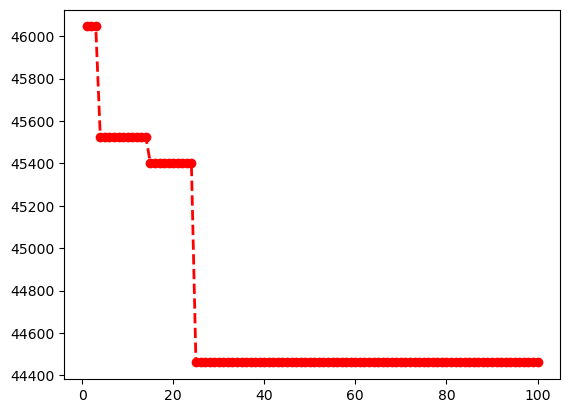

In [69]:
print('運行時間: ' + str(round(t2-t1, 2)) + ' seconds')
print('best_fitness = ', best_fitness)
x = np.zeros(100)
for i in range(100):
    x[i] = i+1
plt.plot(x, BBB, 'ro--', linewidth=2, markersize=6)
plt.show()

In [25]:
# 
BN_10_10_30

(array([[[1.62700860e+01, 2.79410156e+03],
         [1.50668096e+01, 6.28509840e+03],
         [4.31121534e+00, 4.08205802e+03],
         ...,
         [5.36313057e+00, 6.51124366e+02],
         [6.33479841e-01, 5.24959164e+03],
         [3.59326618e-01, 6.45501540e+03]],
 
        [[3.12769920e+01, 4.25149137e+03],
         [6.22713453e-01, 3.77402970e+03],
         [3.66994639e+00, 9.51812239e+02],
         ...,
         [1.77769920e+01, 3.99049137e+03],
         [2.56016550e+00, 4.40331476e+03],
         [2.23334557e+01, 3.04059210e+03]],
 
        [[3.12769920e+01, 4.25149137e+03],
         [6.22713453e-01, 3.77402970e+03],
         [3.66994639e+00, 9.51812239e+02],
         ...,
         [1.77769920e+01, 3.99049137e+03],
         [2.56016550e+00, 4.40331476e+03],
         [2.23334557e+01, 3.04059210e+03]],
 
        ...,
 
        [[2.34391679e+00, 1.05050771e+03],
         [1.54218837e+01, 5.84656017e+03],
         [2.34391679e+00, 8.30507714e+02],
         ...,
         [1.58439

In [26]:
BN_10_10_30_2 = copy.deepcopy(BN_10_10_30[2])
BN_10_10_30_2[0], operational_real_vessels_data_set[0:19, 13:15]

(array([[2.34391679e+00, 1.05050771e+03],
        [1.54218837e+01, 5.84656017e+03],
        [2.34391679e+00, 8.30507714e+02],
        [2.23644730e+01, 4.96131613e+03],
        [2.34391679e+00, 1.46950771e+03],
        [1.58439168e+01, 1.05050771e+03],
        [1.69899686e+01, 2.69231082e+03],
        [1.58439168e+01, 1.46950771e+03],
        [1.92188367e+00, 5.43140017e+03],
        [1.92188367e+00, 5.84656017e+03]]),
 array([[369.  ,  13.  ],
        [171.9 ,  13.  ],
        [170.  ,  15.  ],
        [333.96,  13.  ],
        [107.02,  13.  ],
        [147.87,  14.  ],
        [181.76,  13.  ],
        [211.  ,  13.  ],
        [365.16,  13.  ],
        [112.5 ,  13.  ]]))

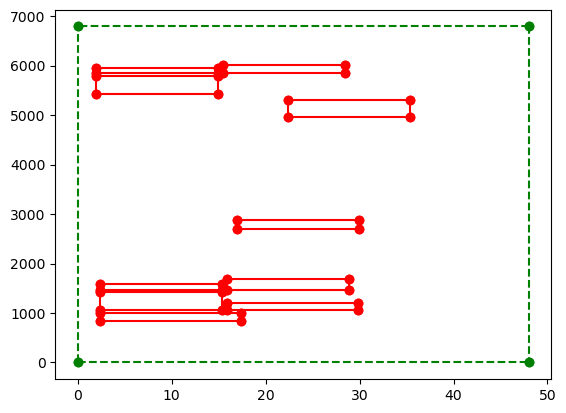

In [29]:
# 視覺化一下       (time_horizon, wf_len, m, one_nest_with_ST_SP, real_data_std)
one_nest_visualize(48, 6790, 10, BN_10_10_30_2[0], operational_real_vessels_data_set)

In [30]:
BN_10_10_30_ = BN_10_10_30[0]
if_negative_count = 0
for i in range(100):                                                 # i = iter_num
    if_print = 0
    for j in range(10):                                              # j = m
        if BN_10_10_30_[i,j,0] < 0 or BN_10_10_30_[i,j,1] < 0:
            print(i, j)
            if if_print == 0:
                print(i, BN_10_10_30_[i])
                print(one_nest_visualize(time_horizon, wf_len, 10, BN_10_10_30_[i], operational_real_vessels_data_set))
                                                             # m
                if_print += 1
            if_negative_count += 1
            continue
if if_negative_count == 0:
    print('沒有負值')

沒有負值
